In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [63]:
df = pd.read_csv('part_10.csv')
df.shape

(57845, 8)

In [64]:
df.sample(8)

CLIENT_IP                                   CLIENT_USERAGENT  \
12396    31.173.84.136  Mozilla/5.0 (iPhone; CPU iPhone OS 7_1 like Ma...   
16648     2.60.129.173  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...   
34480  178.236.141.227                             python-requests/2.18.4   
456     188.170.80.161  Mozilla/5.0 (Linux; Android 6.0.1; Redmi Note ...   
52871     84.214.54.35  Mozilla/5.0 (iPhone; CPU iPhone OS 11_1_2 like...   
19303    66.249.88.153  Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...   
51989   217.175.140.69  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
54144   208.65.146.240  Mozilla/5.0 (Unknown; Linux x86_64) AppleWebKi...   

      REQUEST_SIZE RESPONSE_CODE MATCHED_VARIABLE_SRC  \
12396          577           200          REQUEST_URI   
16648         1488           404      REQUEST_COOKIES   
34480          259           200     REQUEST_GET_ARGS   
456            981           404     REQUEST_GET_ARGS   
52871         1056           302    REQUEST_POST_ARGS   
19303          828           404     REQUEST_GET_ARGS   
51989          986           200     RESPONSE_HEADERS   
54144          387           200     REQUEST_GET_ARGS   

              MATCHED_VARIABLE_NAME  \
12396                           NaN   
16648       REQUEST_COOKIES.User-cn   
34480         REQUEST_GET_ARGS.sign   
456              REQUEST_GET_ARGS._   
52871  REQUEST_POST_ARGS.RedirectTo   
19303            REQUEST_GET_ARGS._   
51989            RESPONSE_HEADERS.S   
54144         REQUEST_GET_ARGS.code   

                                  MATCHED_VARIABLE_VALUE              EVENT_ID  
12396  /var/cache/images/product/eb/aa/ebaa9d709bcc59...  AVdnGC5Dq1Ppo9zF8hZL  
16648                                       Иван Пахомов  zaLbImQB5cBXmMW19TBg  
34480                   06bdddf46a6181eadc51e3acc9f63538  nKdEI2QB5cBXmMW1ljZ7  
456                                            955351552  O2KXHWQB5cBXmMW1Ke6c  
52871  /mail/osl/kbretsch.nsf/iNotes/Mail/?OpenDocume...  5cK4_mMBjksgoq1ez6rb  
19303                                      1516496911306  SKhmI2QB5cBXmMW18-2H  
51989                                       ampudcneup50  HFdNHGQB5cBXmMW1qYsH  
54144                     3a8aadcc52a6igc41ie04ifci748h8  qkz4GmQB5cBXmMW1e5uT

In [65]:
cols_describe = [df[df.columns[i]].describe() for i in range(len(df.columns))]
print(*cols_describe, sep='\n'*3)

count              57838
unique             24940
top       217.175.140.69
freq               11286
Name: CLIENT_IP, dtype: object


count                                                 57517
unique                                                 6992
top       Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
freq                                                   2117
Name: CLIENT_USERAGENT, dtype: object


count     57794
unique     5758
top         259
freq        261
Name: REQUEST_SIZE, dtype: object


count     57770
unique       60
top         200
freq      25771
Name: RESPONSE_CODE, dtype: object


count                57730
unique                  21
top       REQUEST_GET_ARGS
freq                 20812
Name: MATCHED_VARIABLE_SRC, dtype: object


count                  53167
unique                  3209
top       REQUEST_GET_ARGS._
freq                   11165
Name: MATCHED_VARIABLE_NAME, dtype: object


count                                                 57683
unique       

In [7]:
# можно попробовать доп признак:
df['CLIENT_USERAGENT'].str.contains('bot').value_counts()
# UPD: признак не принес особого прироста

False    52860
True      4657
Name: CLIENT_USERAGENT, dtype: int64

In [66]:
#df.loc[df['CLIENT_USERAGENT'].str.contains('bot')==True]

In [67]:
df.MATCHED_VARIABLE_VALUE.str.contains('xmlrpc').value_counts()
#df.loc[df.MATCHED_VARIABLE_VALUE.str.contains('xmlrpc')==True]

False    57682
True         1
Name: MATCHED_VARIABLE_VALUE, dtype: int64

In [68]:
# попробуем доп признак:
#df['Bot_or_not'] = df['CLIENT_USERAGENT'].apply(lambda x: 1 if ('bot' in str(x)) else 0)

In [69]:
#df.Bot_or_not.value_counts()

In [7]:
df.RESPONSE_CODE.value_counts()

200                                 25771
404                                 20367
302                                  6630
403                                  1156
304                                   940
504                                   700
301                                   584
502                                   558
500                                   318
400                                   212
204                                   116
206                                    90
307                                    74
405                                    63
503                                    62
401                                    46
303                                    37
207                                     4
8db0d594d4b89f35dbedc593c724c29b        1
dcbfc5eef493e919119fd48eb4f957ad        1
fc59a2c72afacddb8f8492c3c065b0e0        1
d64bdad286ae021642535d4f119a0546        1
01bfebabb27b66e033b76a34951b41cb        1
b09268bd2d762c0a2b222c2575c658ba  

In [8]:
# куча левых респонз кодов,появившихся по 1 разу и похожих на искусственные, думаю, их можно удалить 

In [12]:
response_codes_ok = [226,431,451,510,511, list(range(100,104)), list(range(200,209)), list(range(300,309)), list(range(400,419)), list(range(421,430)), list(range(500,509))]

In [70]:
def flat_list(lst):
    res = []
    for sub in lst:
        if isinstance(sub, list):
            res.extend(flat_list(sub))
        else:
            res.append(str(sub))
    return res

In [71]:
# слишком много уникальных + айдишники чаще всего бесполезныб попробуем удалить
cols2drop = ['MATCHED_VARIABLE_VALUE','EVENT_ID']
response_codes_ok = flat_list(response_codes_ok)



In [72]:
df.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'REQUEST_SIZE', 'RESPONSE_CODE',
       'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME',
       'MATCHED_VARIABLE_VALUE', 'EVENT_ID'],
      dtype='object')

In [73]:
df_clean = df.drop(cols2drop, axis=1)
#df_clean = df_clean.loc[df_clean.RESPONSE_CODE.isin(response_codes_ok)]
df_clean.sample(3)

CLIENT_IP                                   CLIENT_USERAGENT  \
54381   77.221.130.13  {${print(chr(49).chr(55).chr(73).chr(53).chr(5...   
40376  178.70.234.106            sqlmap/1.2.1.18#dev (http://sqlmap.org)   
20068  171.242.214.63  Mozilla/5.0 (Linux; Android 7.1.1; TA-1021 Bui...   

      REQUEST_SIZE RESPONSE_CODE MATCHED_VARIABLE_SRC  \
54381          391           200         REQUEST_ARGS   
40376          320           200     REQUEST_GET_ARGS   
20068         1367           200         REQUEST_PATH   

                 MATCHED_VARIABLE_NAME  
54381                               id  
40376  REQUEST_GET_ARGS.refererLayerId  
20068                     REQUEST_PATH

In [74]:
# проверка признака CLIENT_IP на валидность
import ipaddress
def check_ip_valid(x):
    try:
        ip_obj = ipaddress.ip_address(x)
        if isinstance(ip_obj, ipaddress.IPv4Address) or isinstance(ip_obj, ipaddress.IPv6Address):
            return 1
        else:
            return 0
    except ValueError:
        return 0
df_clean['CLIENT_IP_VALID'] = df_clean['CLIENT_IP'].apply(lambda ip: check_ip_valid(ip))
df_clean.sample(3)

CLIENT_IP                                   CLIENT_USERAGENT  \
27062  46.147.151.54  Mozilla/5.0 (Linux; Android 4.4.4; GT-I9300I B...   
33124   87.117.26.84  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
22300   188.234.8.15  Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...   

      REQUEST_SIZE RESPONSE_CODE              MATCHED_VARIABLE_SRC  \
27062         1462           404                   REQUEST_COOKIES   
33124        15137           302  REQUEST_METHOD\';\'REQUEST_CONTE   
22300         1611           404                   REQUEST_COOKIES   

            MATCHED_VARIABLE_NAME  CLIENT_IP_VALID  
27062     REQUEST_COOKIES.User-cn                1  
33124                         NaN                1  
22300  REQUEST_COOKIES.LtpaToken2                1

In [75]:
df_clean.loc[df_clean.CLIENT_IP_VALID==0].shape

(147, 7)

In [76]:
# тут полно всякой подозрительной фигни. Можно в отдельный датафрейм соранить, потом смержить с чистым.
df_spooky = df_clean.loc[df_clean.CLIENT_IP_VALID==0]
df_clean.loc[df_clean.CLIENT_IP_VALID==0].to_csv('Bad_IP.csv', index=False)
df_clean.loc[df_clean.CLIENT_IP_VALID==0]

CLIENT_IP  \
50     > -gOxT"O<Ghèe]Ø
È8 G`Qf¾ñ
}y
ðù!T...   
162                                Remote Code Execution   
590                     2a01:598:9902:df0c:8115:691e:c38   
1308                                             ~@.*")ۅ   
1894                               Remote Code Execution   
...                                                  ...   
55871                                                ÕBÿ   
55896                              Remote Code Execution   
56858                   2a00:1148:b0ba:2615:8b4:f98f:f56   
57452                                                NaN   
57705                   2a00:1148:b0ba:2615:8b4:f98f:f56   

                                        CLIENT_USERAGENT  \
50                                         SQL Injection   
162                                 AVdtgf8uq1Ppo9zF_hyd   
590    Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...   
1308                                       SQL Injection   
1894                                AVddr1QQq1Ppo9zF3Vuj   
...                                                  ...   
55871                               AVddkIdNq1Ppo9zF3QzL   
55896                               AVdcvSoAq1Ppo9zF2y_z   
56858  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...   
57452                                                NaN   
57705  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...   

                           REQUEST_SIZE                     RESPONSE_CODE  \
50                 AVdYz8-Wq1Ppo9zF0mzK  2f53b17df6da6bf9aeec27b0d87413c4   
162    4df2f46285c84ba39fa84fc4878214ae                               NaN   
590                                1272                               304   
1308               AVdsla-3q1Ppo9zF_J7c  dd7ff149a6270e8037f6aa280b4ca1bd   
1894   0b168993dda4ce786f3455d01e162a58                               NaN   
...                                 ...                               ...   
55871                               NaN                               NaN   
55896  1cc6e2fe3fcc728c132e90c43d6b787d                               NaN   
56858                               812                               200   
57452                               NaN                               NaN   
57705                               824                               200   

      MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  CLIENT_IP_VALID  
50                     NaN                   NaN                0  
162                    NaN                   NaN                0  
590        REQUEST_COOKIES         nf_wp_session                0  
1308                   NaN                   NaN                0  
1894                   NaN                   NaN                0  
...                    ...                   ...              ...  
55871                  NaN                   NaN                0  
55896                  NaN                   NaN                0  
56858          REQUEST_URI                   NaN                0  
57452                  NaN                   NaN                0  
57705          REQUEST_URI                   NaN                0  

[147 rows x 7 columns]

In [77]:
df_clean = df_clean[df_clean.CLIENT_IP_VALID==1]
df_clean.reset_index(drop=True, inplace=True)
df_clean.drop('CLIENT_IP_VALID', inplace=True, axis=1)
df_clean.head()

CLIENT_IP                                   CLIENT_USERAGENT  \
0   188.138.92.55                                                NaN   
1  93.158.215.131  Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...   
2  176.123.240.64  Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...   
3     73.78.81.63  Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...   
4     66.102.9.44  Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...   

  REQUEST_SIZE RESPONSE_CODE MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  
0          166           404          REQUEST_URI                   NaN  
1          431           302     REQUEST_GET_ARGS                   url  
2          395           403         REQUEST_PATH                   NaN  
3          387           302     REQUEST_GET_ARGS                   url  
4         1733           404     REQUEST_GET_ARGS    REQUEST_GET_ARGS._

In [78]:
# preprocessing

In [79]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


df_clean['REQUEST_SIZE'] = pd.to_numeric(df_clean['REQUEST_SIZE'], errors='coerce')
df_clean['RESPONSE_CODE'] = pd.to_numeric(df_clean['RESPONSE_CODE'], errors='coerce')

print(df_clean.shape)

df_clean = df_clean.dropna(subset=['REQUEST_SIZE', 'RESPONSE_CODE'])
print(df_clean.shape)

df_clean['CLIENT_USERAGENT'].fillna('Unknown', inplace=True)
df_clean['MATCHED_VARIABLE_NAME'].fillna('NonDefined', inplace=True)

df_clean.drop_duplicates(inplace=True)
print(df_clean.shape)
df_clean.head(2)

(57698, 6)
(57698, 6)
(49803, 6)


CLIENT_IP                                   CLIENT_USERAGENT  \
0   188.138.92.55                                            Unknown   
1  93.158.215.131  Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...   

   REQUEST_SIZE  RESPONSE_CODE MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  
0           166            404          REQUEST_URI            NonDefined  
1           431            302     REQUEST_GET_ARGS                   url

In [80]:
userag_list=[''.join(i.split()) for i in df_clean['CLIENT_USERAGENT'].values.tolist()]
userag_list[:2]

['Unknown',
 'Mozilla/5.0(WindowsNT6.3;WOW64;rv:45.0)Gecko/20100101Firefox/45.0']

In [81]:
df_clean['CLIENT_USERAGENT'] = userag_list
df_clean['CLIENT_USERAGENT'][:2]

0                                              Unknown
1    Mozilla/5.0(WindowsNT6.3;WOW64;rv:45.0)Gecko/2...
Name: CLIENT_USERAGENT, dtype: object

In [82]:
df_clean['CLIENT_USERAGENT'] = df_clean['CLIENT_USERAGENT'].str.replace(r'[^a-zA-Z0-9]+','')
df_clean.head(2)

CLIENT_IP                                   CLIENT_USERAGENT  \
0   188.138.92.55                                            Unknown   
1  93.158.215.131  Mozilla50WindowsNT63WOW64rv450Gecko20100101Fir...   

   REQUEST_SIZE  RESPONSE_CODE MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  
0           166            404          REQUEST_URI            NonDefined  
1           431            302     REQUEST_GET_ARGS                   url

In [83]:
le = LabelEncoder()
df_clean['CLIENT_USERAGENT'] = le.fit_transform(df_clean['CLIENT_USERAGENT'])
df_clean.head(2)

CLIENT_IP  CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  \
0   188.138.92.55              6683           166            404   
1  93.158.215.131              5714           431            302   

  MATCHED_VARIABLE_SRC MATCHED_VARIABLE_NAME  
0          REQUEST_URI            NonDefined  
1     REQUEST_GET_ARGS                   url

In [84]:
scaler1 = StandardScaler()
df_clean[['REQUEST_SIZE','RESPONSE_CODE']] = scaler1.fit_transform(df_clean[['REQUEST_SIZE', 'RESPONSE_CODE']])

In [85]:
userag_list2=[''.join(i.split()) for i in df_clean['MATCHED_VARIABLE_SRC'].values.tolist()]
df_clean['MATCHED_VARIABLE_SRC'] = userag_list2
df_clean['MATCHED_VARIABLE_SRC'] = df_clean['MATCHED_VARIABLE_SRC'].str.replace(r'[^a-zA-Z0-9]+','')
df_clean['MATCHED_VARIABLE_SRC'] = le.fit_transform(df_clean['MATCHED_VARIABLE_SRC'])

In [86]:
userag_list3=[''.join(i.split()) for i in df_clean['MATCHED_VARIABLE_NAME'].values.tolist()]
df_clean['MATCHED_VARIABLE_NAME'] = userag_list3
df_clean['MATCHED_VARIABLE_NAME'] = df_clean['MATCHED_VARIABLE_NAME'].str.replace(r'[^a-zA-Z0-9]+','')
df_clean['MATCHED_VARIABLE_NAME'] = le.fit_transform(df_clean['MATCHED_VARIABLE_NAME'])

In [87]:
df_clean.head(2)

CLIENT_IP  CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  \
0   188.138.92.55              6683      -0.05240       0.962728   
1  93.158.215.131              5714      -0.05021      -0.067731   

   MATCHED_VARIABLE_SRC  MATCHED_VARIABLE_NAME  
0                    16                    505  
1                     8                   3017

In [88]:
scaler2 = StandardScaler()
df_clean[['CLIENT_USERAGENT','MATCHED_VARIABLE_SRC','MATCHED_VARIABLE_NAME']] = scaler2.fit_transform(df_clean[['CLIENT_USERAGENT','MATCHED_VARIABLE_SRC','MATCHED_VARIABLE_NAME']])

In [89]:
df_clean.head(2)

CLIENT_IP  CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  \
0   188.138.92.55          1.142912      -0.05240       0.962728   
1  93.158.215.131          0.567701      -0.05021      -0.067731   

   MATCHED_VARIABLE_SRC  MATCHED_VARIABLE_NAME  
0              1.557900              -1.172190  
1             -0.311496               2.697512

In [90]:
import ipaddress

def ip_to_int(ip):
    try:
        ip_version = ipaddress.ip_address(ip).version
        if ip_version == 4:  # IPv4
            return int(ipaddress.IPv4Address(ip))
        elif ip_version == 6:  # IPv6
            return int(ipaddress.IPv6Address(ip))
    except ValueError:
        return None  
        
df_clean['CLIENT_IP_INT'] = df_clean['CLIENT_IP'].apply(ip_to_int)
df_clean.head(2)

CLIENT_IP  CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  \
0   188.138.92.55          1.142912      -0.05240       0.962728   
1  93.158.215.131          0.567701      -0.05021      -0.067731   

   MATCHED_VARIABLE_SRC  MATCHED_VARIABLE_NAME CLIENT_IP_INT  
0              1.557900              -1.172190    3163184183  
1             -0.311496               2.697512    1570690947

In [91]:
df_clean_train = df_clean.drop('CLIENT_IP', axis=1)
df_clean_train.head(1)

CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  MATCHED_VARIABLE_SRC  \
0          1.142912       -0.0524       0.962728                1.5579   

   MATCHED_VARIABLE_NAME CLIENT_IP_INT  
0               -1.17219    3163184183

In [92]:
print('Unique values after preprocessing:\n')
print(*(zip(df_clean_train.columns,
            [df_clean_train[df_clean_train.columns[i]].nunique() for i in range(len(df_clean_train.columns))])), sep='\n')

Unique values after preprocessing:

('CLIENT_USERAGENT', 6908)
('REQUEST_SIZE', 5694)
('RESPONSE_CODE', 20)
('MATCHED_VARIABLE_SRC', 21)
('MATCHED_VARIABLE_NAME', 3130)
('CLIENT_IP_INT', 24838)


In [93]:
scaler3 = StandardScaler()
df_clean_train['CLIENT_IP_INT'] = scaler3.fit_transform(df_clean_train[['CLIENT_IP_INT']])
df_clean_train.dropna(subset=['CLIENT_IP_INT'], inplace=True)# = df_clean_train.fillna(df_clean_train.mean())

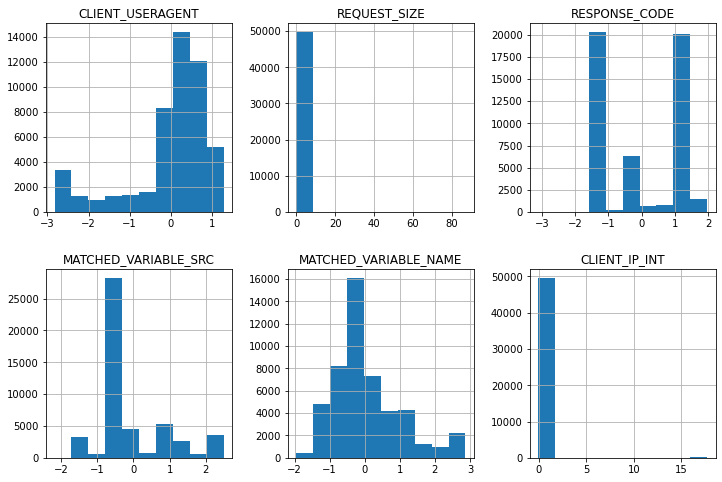

In [94]:
df_clean_train.hist(figsize=(12,8), layout=(-1,3));

In [95]:
from sklearn.cluster import DBSCAN

In [126]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
clustering = dbscan.fit(df_clean_train)

In [127]:
cluster_labels = clustering.labels_
#cluster_labels

In [98]:
df_clean_train['Cluster_Label_dbscan'] = cluster_labels
df_clean_train.head(2)

CLIENT_USERAGENT  REQUEST_SIZE  RESPONSE_CODE  MATCHED_VARIABLE_SRC  \
0          1.142912      -0.05240       0.962728              1.557900   
1          0.567701      -0.05021      -0.067731             -0.311496   

   MATCHED_VARIABLE_NAME  CLIENT_IP_INT  Cluster_Label_dbscan  
0              -1.172190      -0.057196                     0  
1               2.697512      -0.057196                     1

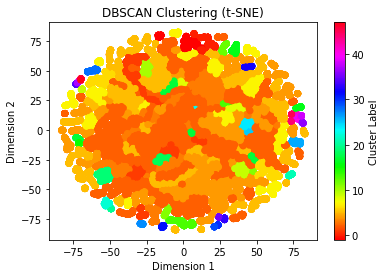

In [119]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(df_clean_train)

plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=cluster_labels, cmap='hsv')
plt.title('DBSCAN Clustering (t-SNE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [128]:
cluster_labels.max(), cluster_labels.min()

(47, -1)

In [100]:
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_clusters_

48

In [101]:
import plotly.express as px

In [103]:
fig = px.scatter_3d(df_clean_train, y='CLIENT_IP_INT', x='RESPONSE_CODE', z='MATCHED_VARIABLE_SRC', color='Cluster_Label_dbscan')
fig.update_traces(marker=dict(size=3))
fig.show()

In [81]:
# идея поделить на октеты отдельно, чтобы не делать нормировку по всему адресу, а взять как отдельные признаки каждый октет. Что делать тогда с ipv6?
# %%time
# ip_df = df[['CLIENT_IP']][:10]
# ip_df.head()
# def ip_to_octs(x):
#     octets = str(x).split('.')
#     #print(octets)
#     if len(octets)==4:
#         ip_df['oct1'] = octets[0]
#         ip_df['oct2'] = octets[1]
#         ip_df['oct3'] = octets[2]
#         ip_df['oct4'] = octets[3]
# #ip_df['oct1','oct2','oct3','oct4'] = ip_df.CLIENT_IP[:10].parallel_apply(ip_to_octs)
# ip_df['oct1'] = ip_df.CLIENT_IP[:10].apply(lambda x: str(x).split('.')[0])
# ip_df['oct2'] = ip_df.CLIENT_IP[:10].apply(lambda x: str(x).split('.')[1])
# ip_df['oct3'] = ip_df.CLIENT_IP[:10].apply(lambda x: str(x).split('.')[2])
# ip_df['oct4'] = ip_df.CLIENT_IP[:10].apply(lambda x: str(x).split('.')[3])
# ip_df.head()

Wall time: 3.99 ms


CLIENT_IP oct1 oct2 oct3 oct4
0   188.138.92.55  188  138   92   55
1  93.158.215.131   93  158  215  131
2  176.123.240.64  176  123  240   64
3     73.78.81.63   73   78   81   63
4     66.102.9.44   66  102    9   44

### проверка алгоритмов

In [107]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [109]:
# better higher
silhouette_score(df_clean_train,cluster_labels)

0.41869321451671654

In [110]:
# better lower
davies_bouldin_score(df_clean_train,cluster_labels)

0.5771727206813891

In [111]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=50, allow_single_cluster=True)

clusters_hdbscan = hdbscan.fit_predict(df_clean_train)
clusters_hdbscan.max(), clusters_hdbscan.min()

(241, -1)

In [113]:
silhouette_hdbscan = silhouette_score(df_clean_train, clusters_hdbscan)
davies_bouldin_hdbscan = davies_bouldin_score(df_clean_train, clusters_hdbscan)
silhouette_hdbscan, davies_bouldin_hdbscan

(0.31083521250608537, 1.4166370312789498)

In [117]:
from sklearn.cluster import KMeans
X = df_clean_train.values
kmeans = KMeans(n_clusters=46)
kmeans.fit(X)
clusters_kmeans = kmeans.predict(X)
print(clusters_kmeans.min(), clusters_kmeans.max())

0 45


In [118]:
silhouette_kmeans = silhouette_score(X, clusters_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(X, clusters_kmeans)
silhouette_kmeans, davies_bouldin_kmeans

(0.5170572419763036, 0.6739777277653747)

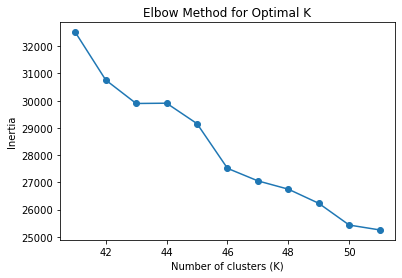

In [116]:
inertia_values = []
k_values = range(41, 52) 

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Итог: 46 кластеров для KMeans и 47-48 для DBSCAN (min_samples=15 or 10)